In [283]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing 
sb.set()

pd.options.display.max_rows = 999



<AxesSubplot:xlabel='LIFE_EXPECTANCY', ylabel='LIFE_EXPECTANCY'>

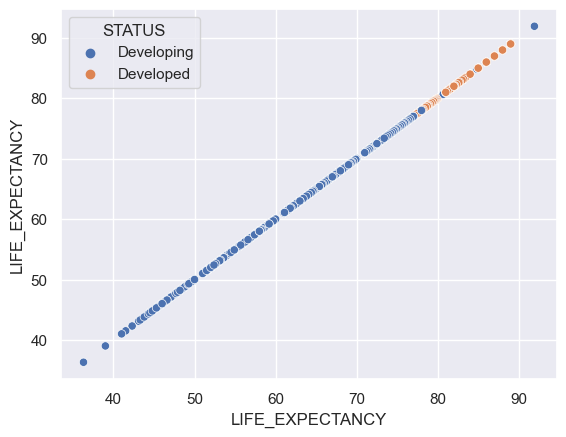

In [330]:
life_filled=pd.read_csv("dataset/life_filled.csv")
sb.scatterplot(x= life_filled["LIFE_EXPECTANCY"], y= life_filled["LIFE_EXPECTANCY"] , hue=life_filled["STATUS"])

#### As we can see here from a graph in Exploratory Data Analysis.ipynb, Developed countries seem to and are expected to have a greater life expectancy compared to developing countries, hence we will see how the other parameters (including Life Expectancy) are able to predict and influence the result of a countries devolopment status.

## Prediction using a Classification Decision Tree (Depth = 4)

In [284]:
lifeTransform =  pd.read_csv("dataset/life_transform.csv")
lifeTransform.drop(columns=lifeTransform.columns[0],axis=1,inplace=True)
lifeTransform

,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.616162,0.006410,0.562634,0.171717,0.000000,-0.765913,0.695802,1.863475,0.215278,10.1
1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.621212,0.127778,0.567017,0.156566,0.000000,-0.745047,-0.642920,1.881842,0.211111,10.0
2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.626263,0.150000,0.556038,0.166667,0.000000,-0.731598,0.674292,1.896363,0.202778,9.9
3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.632997,0.177778,0.639925,0.181818,0.000000,-0.705787,-0.011252,1.914304,0.193056,9.8
4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.639731,0.183333,0.497836,0.186869,0.000000,-1.725140,-0.073218,1.932018,0.180556,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,1,2004.0,0.046784,1.000000,0.484848,0.149101,1.081648,0.340278,0.547009,...,0.534188,0.177778,0.321024,0.171717,0.959553,-0.876123,0.368261,1.109933,0.115278,9.2
2934,Zimbabwe,1,2003.0,0.047953,0.997757,0.479798,0.088457,1.061102,0.018072,0.799610,...,0.529915,0.008547,0.161034,0.186869,0.966928,-0.877103,0.364611,1.166410,0.130556,9.5
2935,Zimbabwe,1,2002.0,0.049708,0.248889,0.474747,0.162786,-2.312958,0.375000,0.715266,...,0.525641,0.211111,0.163773,0.202020,0.974304,-1.768514,-0.857872,-0.981848,0.143056,10.0
2936,Zimbabwe,1,2001.0,0.052632,0.989627,0.474747,-0.554276,-2.312958,0.395833,0.777046,...,0.521368,0.233333,0.059581,0.222222,0.979776,-0.793556,0.357704,-0.744249,0.143056,9.8


In [285]:
lifeTransform.describe()

,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2938.000000
mean,0.825732,2007.518720,0.501309,0.497070,0.498657,-1.876572e-16,-7.742842e-17,0.506461,0.431738,38.790629,0.484631,0.509762,4.402348e-17,0.505652,0.308969,-4.586755e-16,1.053540e-16,-2.648966e-16,0.498775,12.340658
std,0.379405,4.613841,0.278344,0.280640,0.272273,1.000170e+00,1.000170e+00,0.295571,0.340305,20.485912,0.295749,0.302967,1.000170e+00,0.298637,0.389081,1.000170e+00,1.000170e+00,1.000170e+00,0.284977,3.649192
min,0.000000,2000.000000,0.000000,0.000000,0.000000,-1.540089e+00,-2.312958e+00,0.000000,0.000000,1.000000,0.000000,0.000000,-3.762931e+00,0.000000,0.000000,-3.073607e+00,-2.426608e+00,-2.172591e+00,0.000000,0.000000
25%,1.000000,2004.000000,0.249396,0.253333,0.244444,-8.247969e-01,-7.858454e-01,0.245138,0.000000,19.400000,0.230769,0.244444,-5.484182e-01,0.255556,0.000000,-7.687574e-01,-6.717270e-01,-7.715521e-01,0.242630,10.300000
50%,1.000000,2008.000000,0.522222,0.495726,0.489899,1.080217e-01,-6.462024e-02,0.500000,0.487179,43.900000,0.500000,0.518519,-2.295318e-03,0.518519,0.000000,-2.444449e-02,-8.349672e-02,-2.535882e-02,0.508547,12.500000
75%,1.000000,2012.000000,0.742690,0.744048,0.766700,7.882520e-01,9.911980e-01,0.777778,0.730711,56.400000,0.767688,0.777778,5.692044e-01,0.777778,0.736111,8.016743e-01,6.764212e-01,8.014589e-01,0.748889,14.600000
max,1.000000,2015.000000,1.000000,1.000000,1.000000,2.393661e+00,1.623804e+00,1.000000,1.000000,116.135422,1.000000,1.000000,2.871616e+00,1.000000,1.000000,1.746533e+00,2.210668e+00,2.500756e+00,1.000000,26.135726


In [286]:
y = pd.DataFrame(lifeTransform['STATUS'])
x = pd.DataFrame(lifeTransform.loc[:,~lifeTransform.columns.isin(['STATUS','COUNTRY'])])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 19) (2350, 1)
Test Set  : (588, 19) (588, 1)


In [287]:
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x_train, y_train)   

DecisionTreeClassifier(max_depth=4)

[Text(0.6041666666666666, 0.9, 'INCOME_COMPOSITION_OF_RESOURCES <= 0.783\ngini = 0.28\nsamples = 2350\nvalue = [395, 1955]\nclass = Developing'),
 Text(0.3333333333333333, 0.7, 'ALCOHOL <= 0.746\ngini = 0.077\nsamples = 1859\nvalue = [75, 1784]\nclass = Developing'),
 Text(0.16666666666666666, 0.5, 'INCOME_COMPOSITION_OF_RESOURCES <= 0.757\ngini = 0.014\nsamples = 1553\nvalue = [11, 1542]\nclass = Developing'),
 Text(0.08333333333333333, 0.3, 'ALCOHOL <= 0.531\ngini = 0.007\nsamples = 1513\nvalue = [5, 1508]\nclass = Developing'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 1378\nvalue = [0, 1378]\nclass = Developing'),
 Text(0.125, 0.1, 'gini = 0.071\nsamples = 135\nvalue = [5, 130]\nclass = Developing'),
 Text(0.25, 0.3, 'THINNESS_5_to_19_YEARS <= -1.28\ngini = 0.255\nsamples = 40\nvalue = [6, 34]\nclass = Developing'),
 Text(0.20833333333333334, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Developed'),
 Text(0.2916666666666667, 0.1, 'gini = 0.105\nsamples = 36\

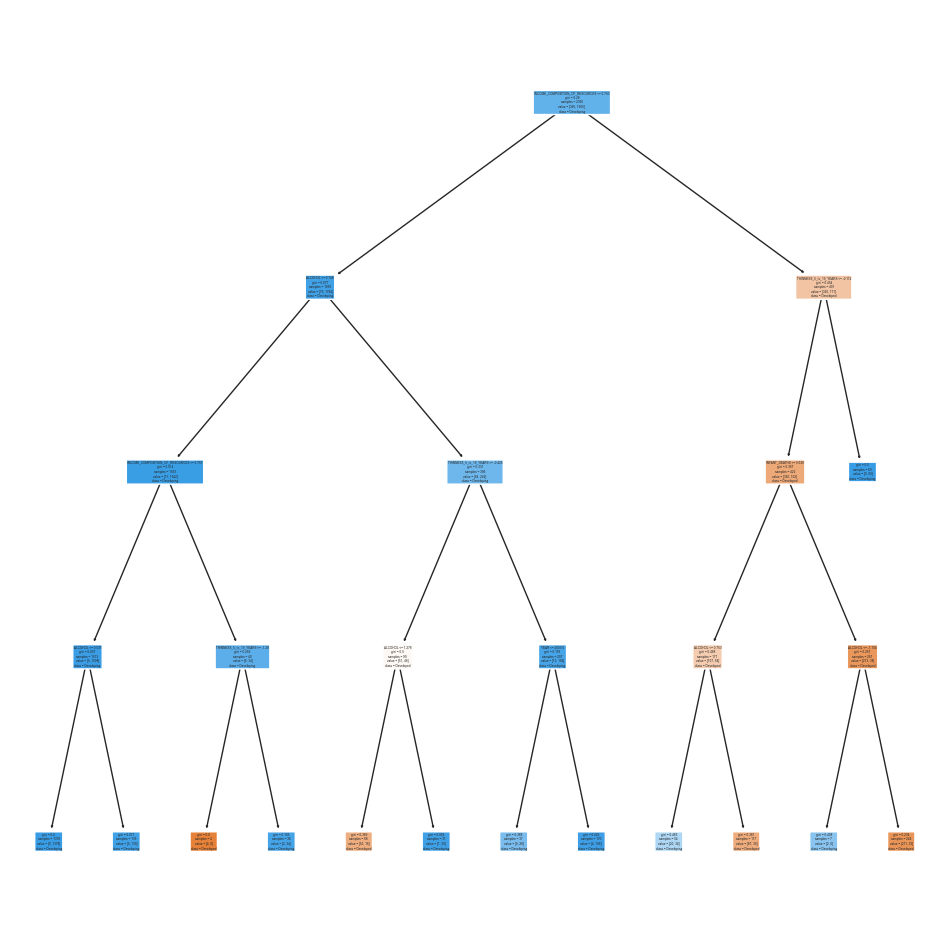

In [288]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["Developed","Developing"])

### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy and Confusion Matrix.

In [289]:
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

In [295]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9472340425531914

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9387755102040817



<AxesSubplot:>

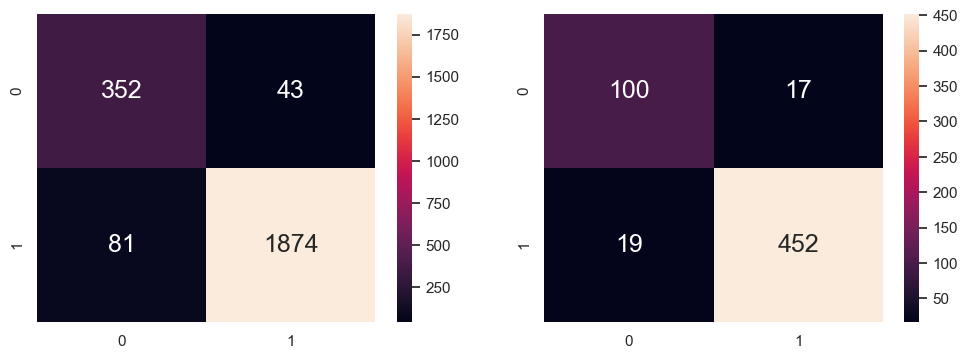

In [296]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [297]:
print("Train Data for Classification Tree")
print("Accuracy  :\t", dectree.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, ytrain_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data for Classification Tree
Accuracy  :	 0.9472340425531914

TPR Train :	 0.043989769820971865
TNR Train :	 0.22784810126582278

FPR Train :	 0.7721518987341772
FNR Train :	 0.9560102301790281


In [298]:
print("Test Data for Classification Tree")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, ytest_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data for Classification Tree
Accuracy  :	 0.9387755102040817

TPR Test :	 0.04246284501061571
TNR Test :	 0.21367521367521367

FPR Test :	 0.7863247863247863
FNR Test :	 0.9575371549893843


# Logistics Regression


<AxesSubplot:xlabel='LIFE_EXPECTANCY', ylabel='LIFE_EXPECTANCY'>

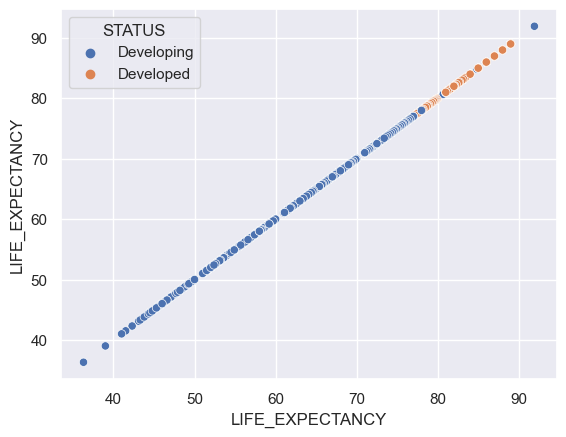

In [300]:
life_filled=pd.read_csv("dataset/life_filled.csv")
sb.scatterplot(x= life_filled["LIFE_EXPECTANCY"], y= life_filled["LIFE_EXPECTANCY"] , hue=life_filled["STATUS"])

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [302]:
LogsRegDF = pd.read_csv("dataset/life_transform.csv")
print("Data dimensions", LogsRegDF.shape)
LogsRegDF.head()

Data dimensions (2938, 22)


,Unnamed: 0,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


### Uni-Variate Regression

In [303]:
logsRegPred = pd.DataFrame(LogsRegDF[["SCHOOLING", "STATUS"]])
logsRegPred.head(n = 1000)

,SCHOOLING,STATUS
0,10.1,1
1,10.0,1
2,9.9,1
3,9.8,1
4,9.5,1
...,...,...
995,17.0,0
996,16.9,0
997,16.9,0
998,16.8,0


In [304]:
logsRegPred.shape


(2938, 2)

In [305]:
Schooling = pd.DataFrame(LogsRegDF["SCHOOLING"])
CountryStatus = pd.DataFrame(LogsRegDF["STATUS"])


## Initializing Country Status:

In [306]:
CountryStatus = pd.get_dummies(CountryStatus, drop_first = False)
CountryStatus['STATUS'] = 1 - CountryStatus['STATUS']
#@CountryStatus.sample(n=5)
#CountryStatus["STATUS"]  = CountryStatus["STATUS"].replace({1:0, 0:1})
CountryStatus
#df_dummies['A_1'] = 1 - df_dummies['A_1']

,STATUS
0,0
1,0
2,0
3,0
4,0
...,...
2933,0
2934,0
2935,0
2936,0


### 1 Means Country is Considered As Developed
### 0 Means Country is Considered As Developing

In [307]:
CountryStatus.dtypes

STATUS    int64
dtype: object

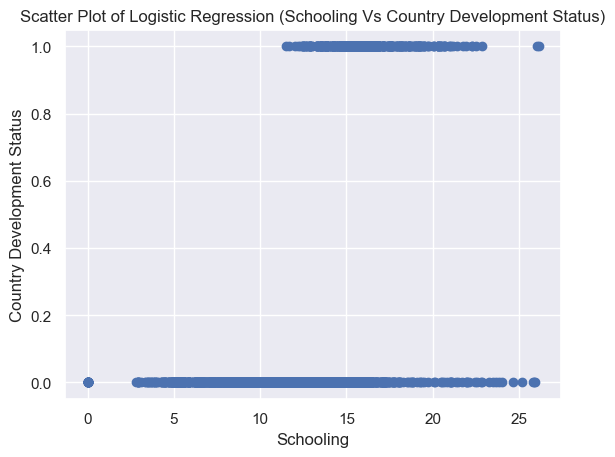

In [308]:
#colors = ['red' if CountryStatus == 1 else 'yellow']
plt.scatter(Schooling, CountryStatus,  cmap='Rainbow')
plt.xlabel ("Schooling")
plt.ylabel("Country Development Status")

plt.title('Scatter Plot of Logistic Regression (Schooling Vs Country Development Status)')
#plt.plot(Schooling, linreg.predict([["Schooling"]]), color = "green")
plt.show()

In [309]:
SchoolingTrain, SchoolingTest, CountryStatusTrain, CountryStatusTest = train_test_split(Schooling, CountryStatus, test_size = 0.25)

In [310]:
LogReg = LogisticRegression(max_iter=2938)

In [311]:
LogReg.fit(SchoolingTrain, CountryStatusTrain)

C:\Users\lotzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2938)

## Predicting Country Development Status using Schooling Years of Citizen

In [312]:
#Try to predict citizen in a certain country with 20 years of schooling vs 2 year of schooling
x = LogReg.predict(np.array([[20]]))[0]
if x==1:
    status = "Developed"
else:
    status = "Developing"
print("citizen with 20 years schooling will most likely live in", status, "Country")

x = LogReg.predict(np.array([[2]]))[0]
if x==1:
    status = "Developed"
else:
    status = "Developing"
print("citizen with 2 years schooling will most likely live in", status, "Country")

citizen with 20 years schooling will most likely live in Developed Country
citizen with 2 years schooling will most likely live in Developing Country


C:\Users\lotzi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lotzi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Multi-Variate Logistics regression


In [313]:
LogsRegDF.drop(columns=LogsRegDF.columns[0],axis=1,inplace=True)
LogsRegDF.head()

,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


In [314]:
LogsRegDF.dtypes

COUNTRY                             object
STATUS                               int64
YEAR                               float64
LIFE_EXPECTANCY                    float64
ADULT_MORTALITY                    float64
INFANT_DEATHS                      float64
ALCOHOL                            float64
PERCENTAGE_EXPENDITURE             float64
HEPATITIS_B                        float64
MEASLES                            float64
BMI                                float64
UNDER_FIVE_DEATHS                  float64
POLIO                              float64
TOTAL_EXPENDITURE                  float64
DIPHTHERIA                         float64
HIV/AIDS                           float64
GDP                                float64
POPULATION                         float64
THINNESS_5_to_19_YEARS             float64
INCOME_COMPOSITION_OF_RESOURCES    float64
SCHOOLING                          float64
dtype: object

In [315]:

LogsRegDF['STATUS'] = 1 - LogsRegDF['STATUS']
#LogsRegDF = pd.concat([LogsRegDF, LogsRegDF_dummies], axis=1)
#LogsRegDF.drop(['STATUS'], axis=1, inplace=True)
LogsRegDF

,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,0,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.616162,0.006410,0.562634,0.171717,0.000000,-0.765913,0.695802,1.863475,0.215278,10.1
1,Afghanistan,0,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.621212,0.127778,0.567017,0.156566,0.000000,-0.745047,-0.642920,1.881842,0.211111,10.0
2,Afghanistan,0,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.626263,0.150000,0.556038,0.166667,0.000000,-0.731598,0.674292,1.896363,0.202778,9.9
3,Afghanistan,0,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.632997,0.177778,0.639925,0.181818,0.000000,-0.705787,-0.011252,1.914304,0.193056,9.8
4,Afghanistan,0,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.639731,0.183333,0.497836,0.186869,0.000000,-1.725140,-0.073218,1.932018,0.180556,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,0,2004.0,0.046784,1.000000,0.484848,0.149101,1.081648,0.340278,0.547009,...,0.534188,0.177778,0.321024,0.171717,0.959553,-0.876123,0.368261,1.109933,0.115278,9.2
2934,Zimbabwe,0,2003.0,0.047953,0.997757,0.479798,0.088457,1.061102,0.018072,0.799610,...,0.529915,0.008547,0.161034,0.186869,0.966928,-0.877103,0.364611,1.166410,0.130556,9.5
2935,Zimbabwe,0,2002.0,0.049708,0.248889,0.474747,0.162786,-2.312958,0.375000,0.715266,...,0.525641,0.211111,0.163773,0.202020,0.974304,-1.768514,-0.857872,-0.981848,0.143056,10.0
2936,Zimbabwe,0,2001.0,0.052632,0.989627,0.474747,-0.554276,-2.312958,0.395833,0.777046,...,0.521368,0.233333,0.059581,0.222222,0.979776,-0.793556,0.357704,-0.744249,0.143056,9.8


In [316]:
# Extract Response and Predictors
y = pd.DataFrame(LogsRegDF['STATUS'])
X = pd.DataFrame(LogsRegDF.loc[:,~LogsRegDF.columns.isin(['STATUS','COUNTRY'])])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 19) (2350, 1)
Test Set  : (588, 19) (588, 1)


In [317]:
print("Shape of x ", X.shape)
y_train.size

Shape of x  (2938, 19)


2350

In [318]:
mymodel = LogisticRegression(max_iter = 2350)
mymodel.fit(X_train, y_train)
#print('Intercept \t: b = ', LogReg.intercept_)
#print('Coefficients \t: a = ', LogReg.coef_)

C:\Users\lotzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2350)

In [319]:
mymodel.score(X_train, y_train)

0.9251063829787234

In [320]:
ytrain_pred = mymodel.predict(X_train)

In [321]:
mymodel.score(X_train, y_train)

0.9251063829787234

<AxesSubplot:>

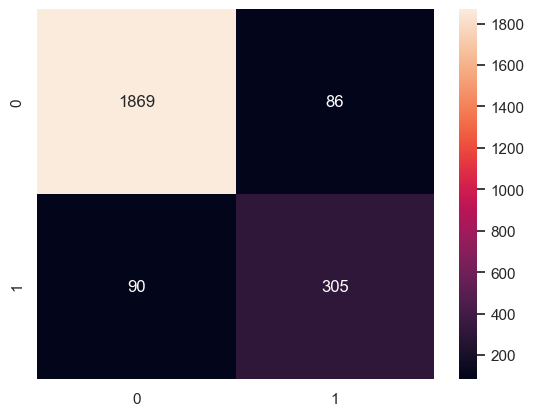

In [322]:
sb.heatmap(confusion_matrix(y_train, ytrain_pred), annot = True, fmt = ".0f")

In [323]:
print("Train Data for Logistics Regression")
print("Accuracy  :\t", mymodel.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, ytrain_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data for Logistics Regression
Accuracy  :	 0.9251063829787234

TPR Train :	 0.7721518987341772
TNR Train :	 0.9560102301790281

FPR Train :	 0.043989769820971865
FNR Train :	 0.22784810126582278


In [324]:
ytest_pred = mymodel.predict(X_test)
ytest_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [325]:
mymodel.score(X_test, y_test)

0.923469387755102

<AxesSubplot:>

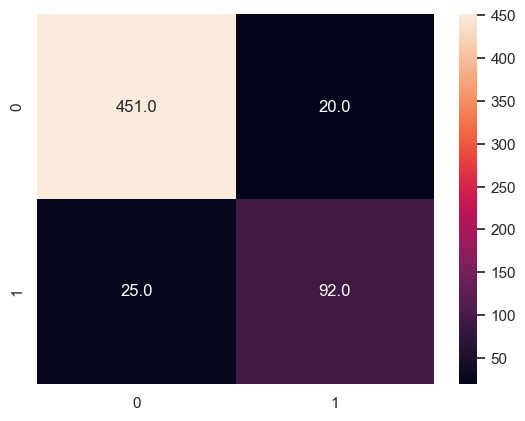

In [326]:
sb.heatmap(confusion_matrix(y_test, ytest_pred), annot = True, fmt = ".1f")

In [327]:
mean_squared_error(y_train, ytrain_pred)

0.0748936170212766

In [328]:
print("Test Data for Logistics Regression")
print("Accuracy  :\t", mymodel.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, ytest_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data for Logistics Regression
Accuracy  :	 0.923469387755102

TPR Test :	 0.7863247863247863
TNR Test :	 0.9575371549893843

FPR Test :	 0.04246284501061571
FNR Test :	 0.21367521367521367


In [329]:
mean_squared_error(y_test, ytest_pred)

0.07653061224489796

### Logistics Regression has a really small value for its mean squared error and posess a high accuracy score at about 92%.
